In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import astropy.units as u
from astropy import constants as const
plt.rc('axes', lw = 2, labelsize = 18)

In [2]:
h = const.h.cgs
k_B = const.k_B.cgs

In [3]:
J = np.arange(16)
B = (57.6 * u.GHz).to(1/u.s)

In [4]:
def run_calc(T):
    Z = (k_B) * T / (h*B)
    coeff = ((2*J + 1)/Z)
    numerator = -h * B * J * (J+1)
    denom = k_B * T
    return coeff * np.exp(numerator/denom)

In [5]:
def predict_jmax(T):
    return ((k_B * T) / (2*h*B))**0.5 - 0.5

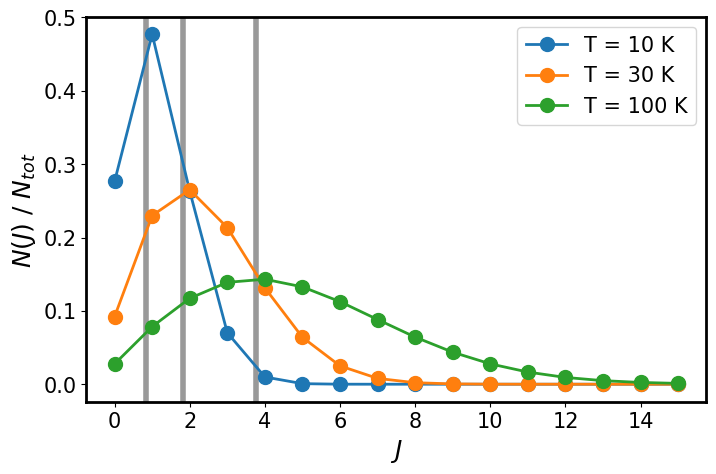

In [6]:
temps = [10, 30, 100] * u.K
plt.figure(figsize = (8,5))

for t in temps:
    plt.plot(J, run_calc(t), lw = 2, marker = '.',markersize = 20, label = 'T = %d K'%t.value)
    plt.axvline(predict_jmax(t), color = 'black', zorder = -1, lw = 4, alpha = 0.4)
    
ax = plt.gca()
ax.tick_params(labelsize = 15)
plt.xlabel('$J$'); plt.ylabel(r'$N(J)$ / $N_{tot}$')
plt.legend(loc = 'upper right', fontsize = 15)
plt.savefig('PopulationLevels.pdf', bbox_inches = 'tight')

In [7]:
J[3], run_calc(33 *u.K)[3]/run_calc(33*u.K)[1]

(3, <Quantity 1.00965814>)

In [8]:
def get3221(T):
    Z = (k_B) * T / (h*B)
    
    J1 = 3
    coeff1 = ((2*J1 + 1)/Z)
    numerator1 = -h * B * J1 * (J1+1)
    denom1 = k_B * T
    a = coeff1 * np.exp(numerator1/denom1)
    
    
    J2 = 1.
    coeff2 = ((2*J2 + 1)/Z)
    numerator2 = -h * B * J2 * (J2+1)
    denom2 = k_B * T
    b = coeff2 * np.exp(numerator2/denom2)
    

    return a/b

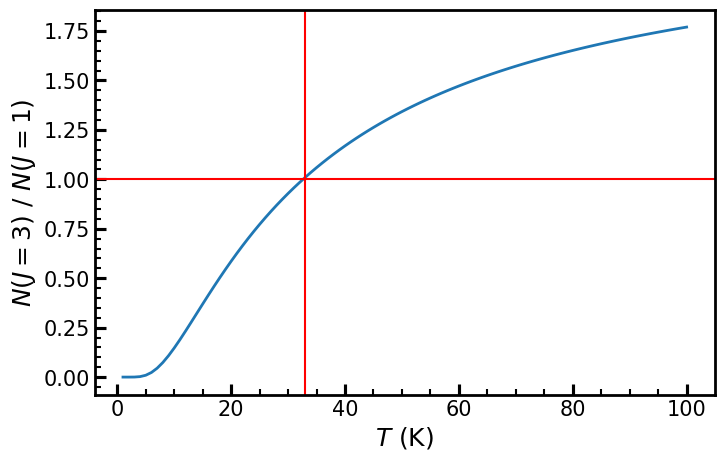

In [9]:
temps = np.linspace(1,100,100)* u.K
plt.figure(figsize = (8,5))

plt.plot(temps, get3221(temps), lw = 2)
#     plt.axvline(predict_jmax(t), color = 'black', zorder = -1, lw = 4, alpha = 0.4)
    
ax = plt.gca()
ax.tick_params(labelsize = 15)
plt.xlabel('$T$ (K)'); plt.ylabel(r'$N(J = 3)$ / $N(J = 1)$')

plt.axhline(1.0, color = 'red')#; plt.axvline(50, color = 'red')

plt.axvline(33, color = 'red')

ax.minorticks_on()
ax.tick_params(which = 'both', direction = 'in')
ax.tick_params(which = 'major', length = 8, width = 2.25)
ax.tick_params(which = 'minor', length = 4, width = 1.5)
plt.savefig('Levels1B.pdf', bbox_inches = 'tight')